# Programming Assignment 3
by John Lindblad and Olle Lindgren

## Introduction (does not need to be included in the report)

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(rescale=1.0/255)

In [2]:
imgdir = 'pa3_images' # or wherever you put them...
img_size = 64
batch_size = 1600

train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1601 images belonging to 2 classes.


In [3]:
X_train, Y_train = train_generator.next()
X_train.shape
Y_train[4]

img_width, img_height, img_depth = X_train[0].shape

In [4]:
len(X_train)

1600

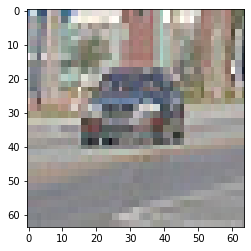

In [5]:
from matplotlib import pyplot as plt
plt.imshow(X_train[4]);

## Part 1: Training a convolutional neural network

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

Using TensorFlow backend.


In [7]:
val_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 576 images belonging to 2 classes.


In [8]:
X_val, Y_val = val_generator.next()
#print(X_val.shape)
#print(X_val[4])
#print(Y_val[4])

In [9]:
len(X_val)

576

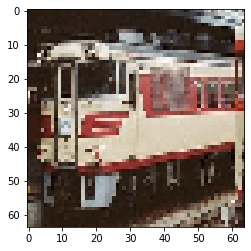

In [10]:
from matplotlib import pyplot as plt
plt.imshow(X_val[4]);

In [11]:
def make_convnet():#x_train, y_train, x_val, y_val):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(img_width, img_height, img_depth))) # 1 or img_depth??
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # 2 classes: car or not car
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    '''
    model.fit(x_train, y_train,
          batch_size=10,
          epochs=10,
          verbose=1,
          validation_data=(x_val, y_val));
    '''
    return model

In [12]:
# debugging
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(batch_size)

(1600, 64, 64, 3)
(1600,)
(576, 64, 64, 3)
(576,)
1600


In [13]:
import time
from tensorflow.keras.callbacks import EarlyStopping
def fit_convnet(model, X_train, Y_train, X_val, Y_val):
    t0 = time.time()
    es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(X_train, Y_train,
              batch_size=10, # 10 - 200?
              epochs=10, # 10 - 2?
              verbose=1,
              validation_data=(X_val, Y_val))
    model.save_weights('saved_weights') # don't know how to use this yet but it will probably save time
    t1 = time.time()
    print('Training time: {:.2f} sec.'.format(t1-t0))
    return history

In [14]:
model = make_convnet()
history = fit_convnet(model, X_train, Y_train, X_val, Y_val)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1600 samples, validate on 576 samples
Epoch 1/10





1600/1600 [==============================] - 14s 9ms/step - loss: 0.6338 - acc: 0.6319 - val_loss: 0.6005 - val_acc: 0.7049
Epoch 2/10
1600/1600 [==============================] - 13s 8ms/step - loss: 0.5315 - acc: 0.7481 - val_loss: 0.5373 - val_acc: 0.7517
Epoch 3/10
1600/1600 [==============================] - 13s 8ms/step - loss: 0.4684 - acc: 0.7794 - val_loss: 0.5684 - val_acc: 0.7344
Epoch 4/10
1600/1600 [==============================] - 13s 8ms/step - loss: 0.4315 - acc: 0.8037 - val_loss: 0.5532 - val_acc: 0.7552
Epoch 5/10
1600/1600 [==============================] - 13s 8ms/step - loss: 0.3612 - acc: 0.8444 - val_loss: 0.6117 - val_acc: 0.7604
Epoch 6/10
1600/1600 [==============================] - 13s 8ms/step - loss: 0.3024 - acc: 0.8756 - val_loss: 0.6339 - val_acc: 0.7378
Epoch 7/10
1600/1600 [=============

In [15]:
# not using this yet
#history.load_weights('saved_weights')

In [16]:
# cell to play around with visualization of training history and "fitting"-curves

import matplotlib.pyplot as plt

def plot_hist(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    return None

In [17]:
# debugging
guesses = model.predict_classes(X_val)
print(guesses[:10])

[[0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]


In [18]:
'''TO-DO:
- create a function doing all this at once in order to make the testing of different augmentaion simpler

''';

## Part 2: Data augmentation

In [19]:
data_gen_augmented = ImageDataGenerator(rescale=1.0/255, brightness_range = (0.0, 1.0))

In [20]:
train_generator = data_gen_augmented.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1601 images belonging to 2 classes.


In [21]:
X_train, Y_train = train_generator.next()

In [22]:
model = make_convnet()
history = fit_convnet(model, X_train, Y_train, X_val, Y_val)

Train on 1600 samples, validate on 576 samples
Epoch 1/10
1600/1600 [==============================] - 14s 9ms/step - loss: 0.6676 - acc: 0.6088 - val_loss: 0.7348 - val_acc: 0.6076
Epoch 2/10
1600/1600 [==============================] - 13s 8ms/step - loss: 0.5779 - acc: 0.7131 - val_loss: 0.8950 - val_acc: 0.6528
Epoch 3/10
1600/1600 [==============================] - 13s 8ms/step - loss: 0.5270 - acc: 0.7494 - val_loss: 0.8124 - val_acc: 0.6684
Epoch 4/10
1600/1600 [==============================] - 13s 8ms/step - loss: 0.4852 - acc: 0.7762 - val_loss: 0.7005 - val_acc: 0.7361
Epoch 5/10
1600/1600 [==============================] - 14s 9ms/step - loss: 0.4478 - acc: 0.7919 - val_loss: 0.5966 - val_acc: 0.7656
Epoch 6/10
1600/1600 [==============================] - 14s 9ms/step - loss: 0.4073 - acc: 0.8169 - val_loss: 0.6003 - val_acc: 0.7604
Epoch 7/10
1600/1600 [==============================] - 13s 8ms/step - loss: 0.3572 - acc: 0.8369 - val_loss: 0.6473 - val_acc: 0.7726
Epoch 8/

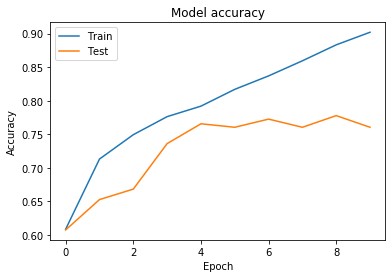

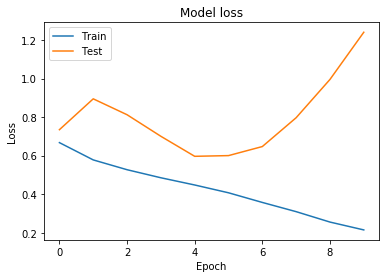

In [23]:
plot_hist(history)

## Optional task: Run your code on a high-performance machine

In [24]:
# NOT STARTED YET

## Interlude: Applying a pre-trained convolutional neural network (should probably not be included in report)

In [25]:
# importing the VGG-16 model
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

vggmodel = applications.VGG16(weights='imagenet', include_top=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


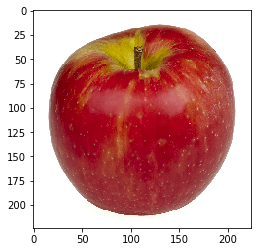

In [26]:
# loading an image
img = load_img('apple.jpg', target_size=(224,224))
plt.imshow(img);

In [27]:
# converting to numpy
from keras.preprocessing.image import img_to_array
arr = img_to_array(img);

# process the array
proc_arr = preprocess_input(arr)

# reshape
your_image = proc_arr.reshape(1, 224, 224, 3)

In [28]:
pred = vggmodel.predict(your_image)
print('Predicted:', decode_predictions(pred, top=10)[0])

Predicted: [('n07742313', 'Granny_Smith', 0.57527566), ('n07768694', 'pomegranate', 0.11990318), ('n07753113', 'fig', 0.079739615), ('n07753592', 'banana', 0.059216265), ('n07747607', 'orange', 0.048092417), ('n03134739', 'croquet_ball', 0.02308206), ('n07749582', 'lemon', 0.017987078), ('n07745940', 'strawberry', 0.01583414), ('n03720891', 'maraca', 0.0074312165), ('n12620546', 'hip', 0.003751107)]


## Part 3: Using VGG-16 as a feature extractor

In [44]:
# imports
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

# random setup stuff
img_size=64
imgdir = 'pa3_images'
batch_size=1600

In [45]:
feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                       input_shape=(img_size, img_size, 3))

In [46]:
vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [47]:
import numpy as np

def create_vgg16_features(directory, filename):
    
    val_generator = vgg_data_gen.flow_from_directory(
        imgdir + directory,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=False)
    
    X_set, Y_set = val_generator.next()
    
    #img_width, img_height, img_depth = X_train[0].shape
    
    cnn_features = feature_extractor.predict(X_set) 
    
    #print(cnn_features)
    
    with open(filename, 'wb') as f:
      np.save(f, cnn_features)
    
    return None

In [ ]:
dir_val = '/validation'
dir_train = '/train'
file_val = 'val_file'
file_train = 'train_file'
create_vgg16_features(dir_train, file_train)

In [48]:
create_vgg16_features(dir_val, file_val)

Found 576 images belonging to 2 classes.


In [49]:
def train_on_cnnfeatures():
    
    with open('train_file', 'rb') as f:
        train_data = np.load(f)
    
    with open('val_file', 'rb') as f:
        val_data = np.load(f)
        
    return None

In [50]:
train_on_cnnfeatures()

# 3: VGG-16 as Feature Extractor

In [54]:
feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                       input_shape=(img_size, img_size, 3))
vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [189]:
imgdir = 'pa3_images' # or wherever you put them...
img_size = 64
feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                       input_shape=(img_size, img_size, 3))
vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_or_test = 'validation'
batch_size = 1600
vgg16_generator = vgg_data_gen.flow_from_directory(
        imgdir + '/' + train_or_test,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=False)

Found 576 images belonging to 2 classes.


In [190]:
X_train, Y_train = vgg16_generator.next()

img_width, img_height, img_depth = X_train[0].shape

print(X_train.shape)
print(Y_train.shape)

(576, 64, 64, 3)
(576,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Not a car


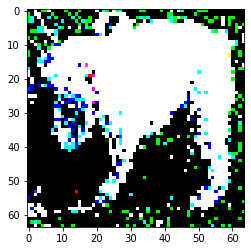

In [191]:
img_nr = 7
plt.imshow(X_train[img_nr])
print('A car' if Y_train[img_nr] > 0 else 'Not a car')

In [192]:
with open('cnn_features/{}/features.npz'.format(train_or_test), 'wb') as f:
    np.savez(f, x = X_train, y = Y_train)
#with open('cnn_features/{}/Y.npy'.format(train_or_test), 'wb') as f:
#    np.save(f, Y_train)

In [193]:
with open('cnn_features/validation/features.npz', 'rb') as f:
    dct = np.load(f)
    #for k in dct.items():
    #    print(k)
    X_val = dct['x']
    Y_val = dct['y']
with open('cnn_features/train/features.npz', 'rb') as f:
    dct = np.load(f)
    #for k in dct.items():
    #    print(k)
    X_train = dct['x']
    Y_train = dct['y']

Basic sanity checks

In [197]:
print(X_val.shape)
print(Y_val.shape)
print(X_train.shape)
print(Y_train.shape)
assert X_val.shape[0] == Y_val.shape[0]
assert X_train.shape[0] == Y_train.shape[0]
assert X_train.shape[0] != X_val.shape[0]

(576, 64, 64, 3)
(576,)
(1600, 64, 64, 3)
(1600,)


## Neural network approach using Keras. Record accuracy is 72%.

In [391]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import EarlyStopping
import time

def get_model():
    
    transfer_model = Sequential()
    transfer_model.add(Flatten(input_shape=X_train[0].shape))
    transfer_model.add(Dense(32, activation='relu'))
    transfer_model.add(Dropout(.15))
    transfer_model.add(Dense(1, activation='sigmoid'))
    return transfer_model

def fit_transfer_net(model, X_train, Y_train, X_val, Y_val, starting_lr=.001):
    model.compile(
        optimizer = RMSprop(), 
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    t0 = time.time()
    es = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    history = model.fit(X_train, Y_train,
              batch_size=10, # 10 - 200?
              epochs=10, # 10 - 2?
              verbose=1,
              validation_data=(X_val, Y_val),
            callbacks = [es])
    model.save_weights('saved_weights') # don't know how to use this yet but it will probably save time
    t1 = time.time()
    print('Training time: {:.2f} sec.'.format(t1-t0))
    return history

# Do initial fit with relatively high learning rate and then evaluate.
# Keep doing this until results are good.
accuracy = 0
min_worthwhile_accuracy = .69
starting_lr = .0005
while accuracy < min_worthwhile_accuracy:
    model = get_model()
    history = fit_transfer_net(model, X_train, Y_train, X_val, Y_val, starting_lr).history

    accuracy = history['val_accuracy'][-1]
    print(f"Accuracy: {accuracy:.2f} ({min_worthwhile_accuracy})")
    starting_lr *= .8


Train on 1600 samples, validate on 576 samples
Epoch 1/10
1600/1600 [==============================] - 1s 653us/step - loss: 177.7263 - accuracy: 0.5544 - val_loss: 174.8282 - val_accuracy: 0.5330
Epoch 2/10
1600/1600 [==============================] - 1s 555us/step - loss: 112.4521 - accuracy: 0.6006 - val_loss: 165.8168 - val_accuracy: 0.5243
Epoch 3/10
1600/1600 [==============================] - 1s 559us/step - loss: 80.3318 - accuracy: 0.6525 - val_loss: 93.9826 - val_accuracy: 0.6337
Epoch 4/10
1600/1600 [==============================] - 1s 559us/step - loss: 47.7854 - accuracy: 0.7350 - val_loss: 124.2273 - val_accuracy: 0.6580
Training time: 4.15 sec.
Accuracy: 0.66 (0.69)
Train on 1600 samples, validate on 576 samples
Epoch 1/10
1600/1600 [==============================] - 1s 642us/step - loss: 198.2280 - accuracy: 0.5663 - val_loss: 134.4941 - val_accuracy: 0.5122
Epoch 2/10
1600/1600 [==============================] - 1s 555us/step - loss: 113.3927 - accuracy: 0.6281 - val_

In [313]:
prd = (model.predict(X_val) > .5).reshape(np.prod(Y_val.shape))
accuracy = np.sum(prd == Y_val) / len(Y_val)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.595


In [ ]:
del min_worthwile_accuracy

## Scikit-learn approaches. Almost 75%.

In [225]:
# Scikit-learn approach. reshape.
X_train_reshaped = X_train.reshape((X_train.shape[0], np.prod(X_train.shape[1:])))
X_val_reshaped = X_val.reshape((X_val.shape[0], np.prod(X_val.shape[1:])))

print(X_val_reshaped.shape)
print(Y_val.shape)
print(X_train_reshaped.shape)
print(Y_train.shape)
assert X_val_reshaped.shape[0] == Y_val.shape[0]
assert X_train_reshaped.shape[0] == Y_train.shape[0]
assert X_train_reshaped.shape[0] != X_val_reshaped.shape[0]

(576, 12288)
(576,)
(1600, 12288)
(1600,)


## Random Forest

In [246]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_reshaped, Y_train)

rf_prd = (rf.predict(X_val_reshaped) > .5).reshape(np.prod(Y_val.shape))
accuracy = np.sum(rf_prd == Y_val) / len(Y_val)
print(accuracy)

0.7465277777777778


## SVC

In [245]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_reshaped, Y_train)

svc_prd = (svc.predict(X_val_reshaped) > .5).reshape(np.prod(Y_val.shape))
accuracy = np.sum(svc_prd == Y_val) / len(Y_val)
print(accuracy)

0.7465277777777778


## KNN

In [338]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_reshaped, Y_train)

knn_prd = (knn.predict(X_val_reshaped) > .5).reshape(np.prod(Y_val.shape))
accuracy = np.sum(knn_prd == Y_val) / len(Y_val)
print(accuracy)

0.609375


## Conclusions

This dataset is really, really weird. To be honest, we've only t

# 4: Visualization

In [323]:
first_layer_weights = vggmodel.get_weights()[0]
first_layer_weights.shape

(3, 3, 3, 64)

In [324]:
def kernel_image(weights, i, positive):
    
    # extract the convolutional kernel at position i
    k = weights[:,:,:,i].copy()
    if not positive:
        k = -k
    
    # clip the values: if we're looking for positive
    # values, just keep the positive part; vice versa
    # for the negative values.
    k *= k > 0

    # rescale the colors, to make the images less dark
    m = k.max()
    if m > 1e-3:
        k /= m 

    return k

## Plotting

It's interesting to see how the images are generally eachothers' opposites. But there aren't really any particular image pairs that are more interesting than any others.

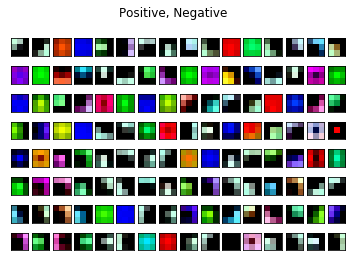

In [336]:
first_layer_weights = vggmodel.get_weights()[0]

# Plot all (positive, negative) pairs side by side.
fig, ax = plt.subplots(8, 16)
for i in range(8):
    for j in range(8):
        ax[i,j*2].matshow(kernel_image(first_layer_weights, i*8+j, True))
        ax[i,j*2].set_xticks([], [])
        ax[i,j*2].set_yticks([], [])
        ax[i,j*2+1].matshow(kernel_image(first_layer_weights, i*8+j, False))
        ax[i,j*2+1].set_xticks([], [])
        ax[i,j*2+1].set_yticks([], [])
fig.suptitle("Positive, Negative")
plt.show()
